# Project 4

In this project, you will summarize and present your analysis from Projects 1-3.

### Intro: Write a problem Statement/ Specific Aim for this project

Answer: Our purpose for project 1-3 was to attempt to predict a student's admission to graduate school by using  undergraduate GRE, GPA and prestige level data.

### Dataset:  Write up a description of your data and any cleaning that was completed

Answer: We dropped NAN fields within our dataset to clean it up for analysis. Luckily this only included a very small subset of our data and reduced our total count of data points from 400 to 397.

### Demo: Provide a table that explains the data by admission status

Mean (STD) or counts by admission status for each variable 

| Not Admitted | Admitted
---| ---|---
GPA | mean(std)  | mean(std)
GRE |mean(std) | mean(std)
Prestige 1 | frequency (%) | frequency (%)
Prestige 2 | frequency (%) | frequency (%)
Prestige 3 |frequency (%) | frequency (%)
Prestige 4 |frequency (%) | frequency (%)

In [2]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
from scipy import stats
%matplotlib inline
#read data
df_raw = pd.read_csv("../assets/admissions.csv")


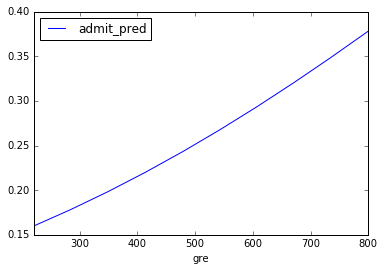

In [22]:
#Drop NAN and pull dummies
df_raw.isnull().sum()
df_raw.dropna(inplace=True)
df_raw.describe()
dummies = pd.get_dummies(df_raw['prestige'],prefix='prestige')
cols_to_keep = ['admit','gpa','gre']
df = df_raw[cols_to_keep].join(dummies)

#Pull table
df_group1 = df[['admit','gpa','gre']].groupby(['admit'],axis=0).mean()
df_group2 = df[['admit','prestige_1.0','prestige_2.0','prestige_3.0','prestige_4.0']].groupby(['admit'],axis=0).sum()
admission_table = df_group1.join(df_group2)
admission_table.transpose().round(2)





### Methods: Write up the methods used in your analysis

To dive into predicting student admission we...

Exploratory Analysis:
1. We very simply began by looking at the size of the data to determine the quality of the data with a .describe() and .head() 
2. We then did some basic charting functions to determine the distribution of the data, as we could not make analysis if it was not distributed in a standard manner.
3. After frequency plots we charted box plots to determine, beyond the standard distribution, how disparate the values were. For example do we have student data from 2.0 gpa to 4.0 gpa? It turns out that almost all of our student data was around 3.5.
4. Next was using my favorite fuction .corr(). This method returns the correlation of each value against each other, when showed us some pretty expected results. Namely, that high GRE, GPA and prestige correlation with a student being admitted. 

Data cleaning:
1. Removed rows from the data where there were no numbers to clean it for analysis. This totaled to 3 rows of data.
2. Within our data was a column titled "prestige" (shown above). This column determined how prestigious the undergraduate program was that given student attended. This data was valuable so to make it usable in our analysis we translated it into 'dummy variables'.

Modeling:
1. To structure our data in such a way that we pass it through the logistic regression method in Stats Models, we created a list which contained our explanatory variable y (student addmited) and new dataframe with the data to which predict it with (GPA,GRE,Prestige,Intercept). 
2. We then defined the model and fit it.
3. We printed the summary and used the exp() function to translate our parameters to odds functions.



### Results: Write up your results

The results we found were what you would generally expect, in that a prestige of 1, a high GPA and a high GRE score led to the highest predictor of the admission for an undergraduate student to a graduate program. 

What is most interesting to us is probably the stratification of prestige. Below are charts created with some help from the Yhat blog. What appears to happen at the higher GRE and GPA levels is prestige of undergraduate matters more. When considering the value of graduate school, being admitted to a top tier school is usually a make or break for most students and this means scoring nearly perfect on test scores. What you might then be able to extract from this analysis is that you are most disadvantaged to a competing student of higher prestige when your test scores are highest and a better strategy may be to focus on other admission criteria than GRE and GPA when considering applying to graduate school.


### Visuals: Provide a table or visualization of these results

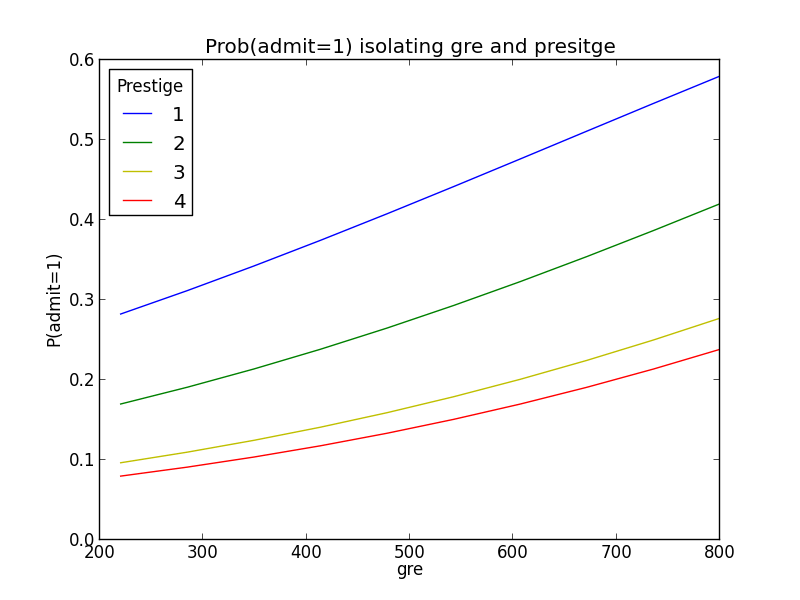

In [35]:
from IPython.display import Image
Image("C:\Users\jsilverberg\Desktop\gre - Copy.png")


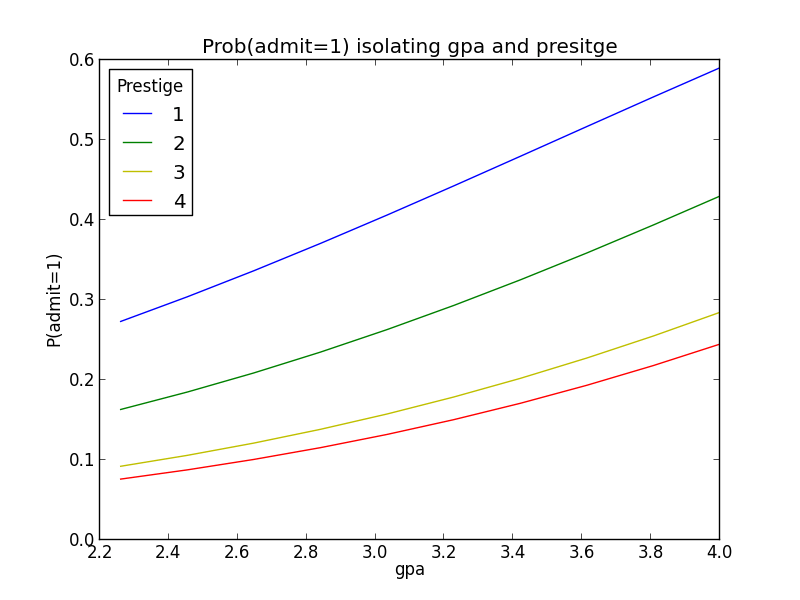

In [34]:
Image("C:\Users\jsilverberg\Desktop\gpa - Copy.png")

### Discussion: Write up your discussion and future steps

I think the logical next is to pull more data so that we can test how accurate this model is and determine it's real usefulness. Afterwards we can have fun and try to expand upon what we built. I think overlay some other data sources. As it stands we can predict if you will be admitted given GRE, GPA and Prestige but we are not taking into account a whole array of other variables that may have interesting social or economic implications. 

For example it would be great to overlay geographic data onto this model to see if we can predict admission by highschool zipcode. A follow-up analaysis may be being a timerseries analysis and seeing the changing demographics (maybe not the rust belt) of who in America is getting (or not getting into college) and applying it in the context of our recent election results. 